In [1]:
'''
Task # 4 - To Explore Decision Tree Algorithm
For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.

Decision Tree - Supervised Learning Technique - Used in both Clasification and Regression
- Tree Struuctured Classifier where :
Internal Nodes -> represents features of Dataset
Branches -> Decision Rule
Each LEaf Node -> Represents the Outcome

Types of Nodes :
1. Decision Notes - has many branches to 
2. Leaf Nodes - the outcomes

The algo used to build the tree is CART -  Classification and Regression Tree algorithm.
Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).
Step-3: Divide the S into subsets that contains possible values for the best attributes.

'''


'\nTask # 4 - To Explore Decision Tree Algorithm\nFor the given ‘Iris’ dataset, create the Decision Tree classifier and\nvisualize it graphically. The purpose is if we feed any new data to this\nclassifier, it would be able to predict the right class accordingly.\n\nDecision Tree - Supervised Learning Technique - Used in both Clasification and Regression\n- Tree Struuctured Classifier where :\nInternal Nodes -> represents features of Dataset\nBranches -> Decision Rule\nEach LEaf Node -> Represents the Outcome\n\nTypes of Nodes :\n1. Decision Notes - has many branches to \n2. Leaf Nodes - the outcomes\n\nThe algo used to build the tree is CART -  Classification and Regression Tree algorithm.\nStep-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).\nStep-3: Divide the S into subsets that contains possible values for the best attributes.\n\n'

In [2]:
#!pip3 install graphviz

In [3]:
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [4]:
def get_data():
    data_frame=pd.read_csv("/home/mishadey/Desktop/GRIP/CODES/TASK 4 DATA/Iris.csv")
    return data_frame

In [5]:
data_frame=get_data()
class_names=data_frame['Species'].unique()
data_frame

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data_frame.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
def preprocess_data(data_frame):
    # for iris-setosa -0,versicolor -1, virginica -2
    for row in range(len(data_frame)):
        if data_frame['Species'][row]== 'Iris-setosa':
            data_frame['Species'][row]=int(0)
        elif data_frame['Species'][row]== 'Iris-virginica':
            data_frame['Species'][row]=int(1)
        else :
            data_frame['Species'][row]=int(2)
    data_frame=data_frame.astype({'Species':int})
    return data_frame

In [9]:
data_frame=preprocess_data(data_frame)

<ipython-input-8-7e50f8478bb4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['Species'][row]=int(0)
<ipython-input-8-7e50f8478bb4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['Species'][row]=int(2)
<ipython-input-8-7e50f8478bb4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['Species'][row]=int(1)


In [10]:
data_frame

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,1
146,147,6.3,2.5,5.0,1.9,1
147,148,6.5,3.0,5.2,2.0,1
148,149,6.2,3.4,5.4,2.3,1


In [20]:
def Plot_HeatMap():
    plt.style.use("dark_background")
    seaborn.heatmap(data_frame.corr(),annot=True,cmap="coolwarm")
    plt.show()

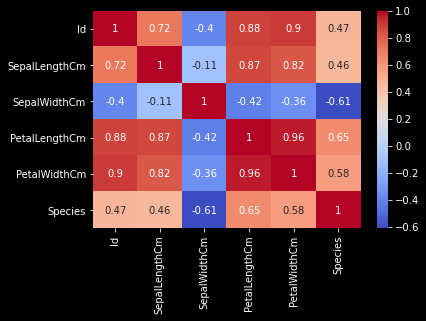

In [21]:
Plot_HeatMap()

In [13]:
def Test_Train_Split(data_frame):
    x_train,x_test,y_train,y_test = train_test_split(data_frame.values[:,1:-1],data_frame.values[:,-1],test_size=0.01,shuffle=False)
    x_train=np.reshape(x_train,(x_train.shape[0],-1))
    x_test=np.reshape(x_test,(x_test.shape[0],-1))
    y_train=np.reshape(y_train,(y_train.shape[0],-1))
    y_test=np.reshape(y_test,(y_test.shape[0],-1))
    return x_train,x_test,y_train,y_test

In [14]:
x_train,x_test,y_train,y_test=Test_Train_Split(data_frame)

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((148, 4), (2, 4), (148, 1), (2, 1))

In [16]:
def Decision_Tree_Algo(x_train,_y_train):
    model=DecisionTreeClassifier()
    model.fit(x_train,y_train)
    return model

In [17]:
model=Decision_Tree_Algo(x_train,y_train)

In [18]:
def Graph_Visualization(model):
    fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
    plot_tree(model,feature_names=data_frame.columns[:-1].tolist(),class_names=class_names.tolist(),filled=True,rounded=True,)    
    plt.show()

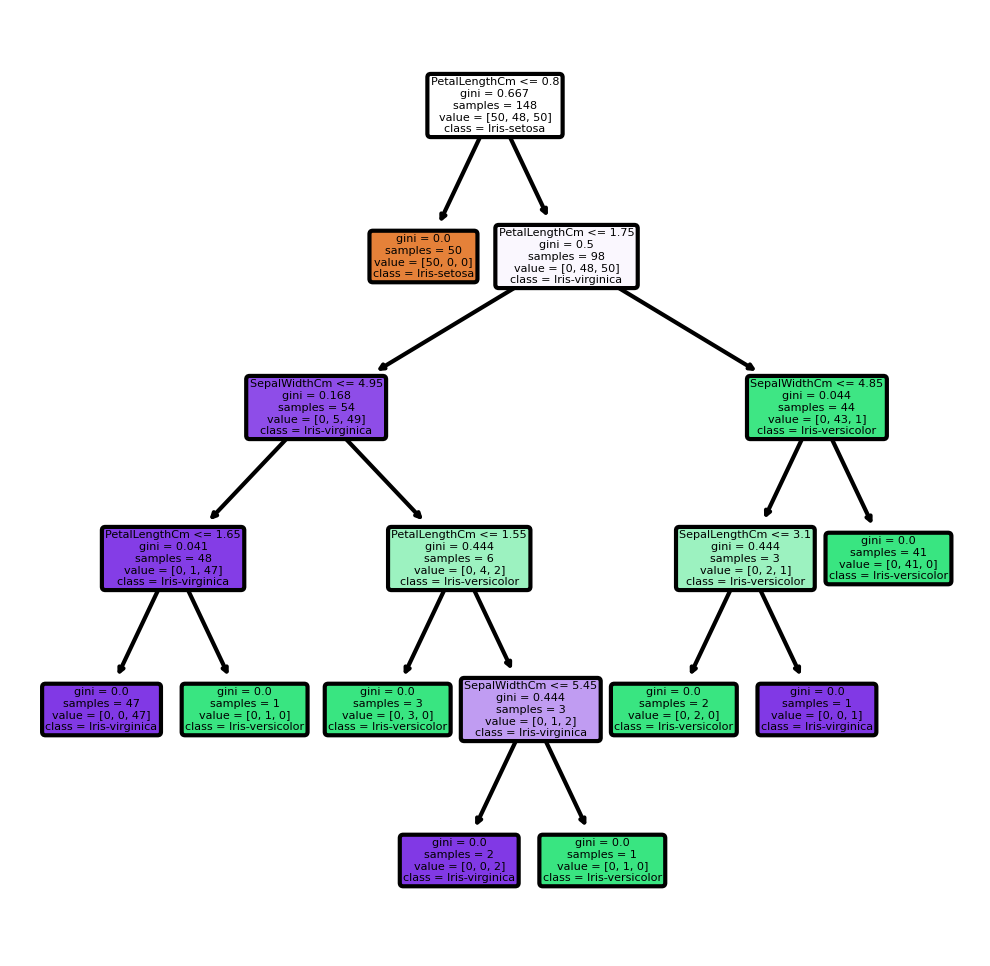

In [19]:
Graph_Visualization(model)

In [ ]:
                                                       """  THANK YOU :)   """